# 1. Housekeeping

In [1]:
import ciao_contrib.runtool
from ciao_contrib.runtool import *
import pandas as pd
import numpy as np
from numpy import load
import astropy 
from astropy.table import Table
from astropy.io import fits
import os
import glob
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import pickle
from IPython.display import clear_output

pd.options.mode.chained_assignment = None

# List Folders Function
def list_folders(path):
    return [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    
# Specify path
path = '/Users/steven/Library/CloudStorage/OneDrive-ImperialCollegeLondon/01-27-2023-FYP-CfA/4-Code-Data/Chandra-Data/'
folders = list_folders(path)
folder_list = []
for folder in folders:
    folder_list.append(folder)

# Select Set
set_widget = widgets.Dropdown(options=folder_list[:],value=folder_list[1],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', index=1, options=('Set-2', 'Set-Y', 'Set-5', 'Set-4', 'Set-3', 'Set-6', 'Set-1')…

# 2. Load Data 

In [3]:
# Set ID
set_id = set_widget.value.split("-")[1]
# Load data
df_inputs = pd.read_csv(f'{path}Set-{set_id}/inputs2-{set_id}.csv')
df_labels = pd.read_csv(f'{path}Set-{set_id}/labels2-{set_id}.csv')
df_inputs.head()
# Group data (combined ID)
df_labels_group = df_labels.drop(columns=['obsid', 'region_id'])
df_input_group = df_inputs.drop(columns=['obsid', 'region_id'])
df_labels_group = df_labels.drop(columns=['obsid', 'region_id'])
df_input_group = df_inputs.drop(columns=['obsid', 'region_id'])
df_labels_group = df_labels_group.groupby('obsreg_id')
df_input_group = df_input_group.groupby('obsreg_id')

print("Number of Eventfiles: ", df_input_group.ngroups)
print("Number of Property Sets: ", df_labels_group.ngroups)

KeyboardInterrupt: 

# 3. Data Representation

2D Histogram Representations

In [5]:
print(hist[0])
print(hist[0]/N)
# or divide by max hist[0]
print(hist[0]/np.max(hist[0]))
print(np.log10(hist[0]+0.01))

NameError: name 'hist' is not defined

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_799/877306145.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["delta_time"] = dfi["delta_time"].apply(lambda dt: np.where(dt == 0, dt + 0.1, dt))
/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_799/877306145.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi["dt"] = np.log10(N * dfi["delta_time"]/T)
/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_799/877306145.py:36: SettingWithCopyWarning: 
A value is trying to 

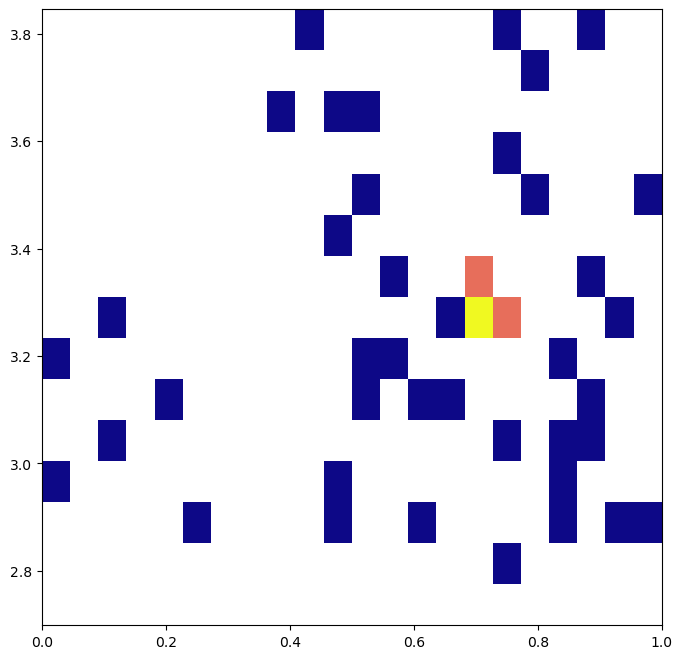

Counter: 887 / 85056


In [ ]:
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
# Set number of bins and bounds of dt axis
nbins_E = 15
nbins_dt = 22
nbins_t = 9
dt_axis_max = 1
dt_axis_min = 0
# Initialise features, labels and ids lists
x_features = []
y_labels = []
id_pass = []
id_fail = []
# Initialise counters
count = 0
fails = 0
count_limit = df_input_group.ngroups

# Loop over all eventfiles
for id_name, dfi in df_input_group:
    # Add delta_time column
    dfi["delta_time"] = dfi['time'].diff()
    # Remove first row as delta_time = nan
    dfi = dfi[dfi["delta_time"].notna()]
    # Add a constant value "pseudo-count" 0.1 to delta_time = 0 
    dfi["delta_time"] = dfi["delta_time"].apply(lambda dt: np.where(dt == 0, dt + 0.1, dt))
    try:
        # Eventfile length, duration and energy range
        N = len(dfi) 
        T = max(dfi["time"])-min(dfi["time"])
        E = max(dfi["energy"])-min(dfi["energy"])
        # Add delta_t column
        dfi["dt"] = np.log10(N * dfi["delta_time"]/T)
        dt_min = min(dfi["dt"])
        dt_max = max(dfi["dt"])
        dfi["dt"] = (dfi["dt"]- min(dfi["dt"]))/(max(dfi["dt"])-min(dfi["dt"]))
        # Add E column
        dfi["E"] = np.log10(dfi["energy"])
        #dfi["E"] = (dfi["E"]- min(dfi["E"]))/(max(dfi["E"])-min(dfi["E"]))
        # Create histogram representation
        fig, ax = plt.subplots(figsize=(3,3))
        #hist = plt.hist2d(df["dt"],df["E"],range = [[dt_axis_min, dt_axis_max],[np.log10(500.), np.log10(7000.)]],bins=(nbins_dt,nbins_E),norm=LogNorm(),cmap = 'plasma', density = True) 
        hist2D = ax.hist2d(dfi["dt"],dfi["E"],range = [[dt_axis_min, dt_axis_max],[np.log10(500.), np.log10(7000.)]],bins=(nbins_dt,nbins_E),norm=LogNorm(),cmap = 'plasma')
        print(id_name)
        plt.show()
        # Create features 
        x = hist2D[0]/np.max(hist2D[0])
        # Create labels
        y = df_labels_group.get_group(id_name)[['cnts_aper_b','cnts_aperbkg_b','src_cnts_aper_b','flux_aper_b','hard_hm','hard_hs','hard_ms','var_prob_b','var_prob_h','var_prob_m',	'var_prob_s']].to_numpy()
        # Append features, labels and ids lists
        x_features.append(x)
        y_labels.append(y)
        id_pass.append(id_name)
        count = count + 1
        print(f'Counter: {count} / {count_limit}')
    except:     
        id_fail.append(id_name)
        fails = fails + 1
        print(f'Fails: {fails}')
# Concatenate labels into a matrix for easier use
y_labels = np.concatenate(y_labels)


In [ ]:
#Describe 
describe = '90scaledt0to1'
# Save arrays
with open(f'{path}Set-{set_id}/x_features-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(x_features, file)
with open(f'{path}Set-{set_id}/y_labels-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(y_labels, file)
with open(f'{path}Set-{set_id}/id_pass-{set_id}-{describe}.pickle', "wb") as file:
    pickle.dump(id_pass, file)

3D Histogram Representation

In [44]:
print(H/N)


total_counts = sum(sum(sum(H)))

print(total_counts)
print(N)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.00662252]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.   

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/1724380088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


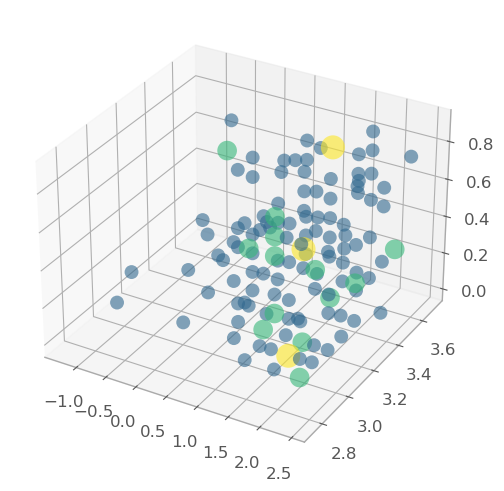

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/1724380088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


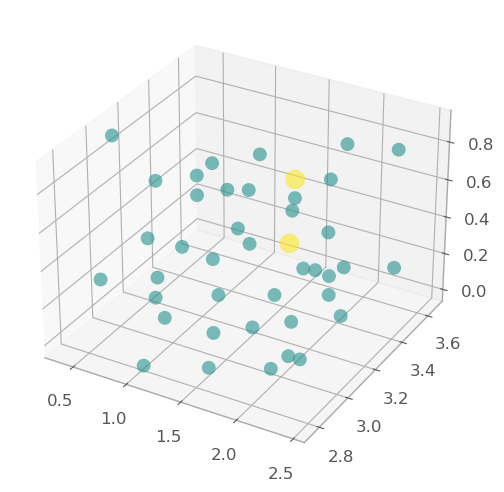

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/1724380088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


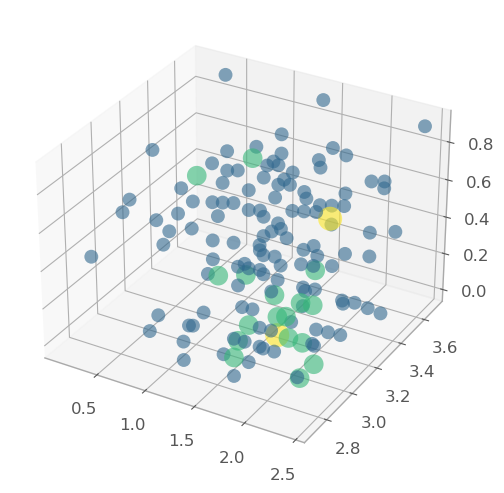

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/1724380088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


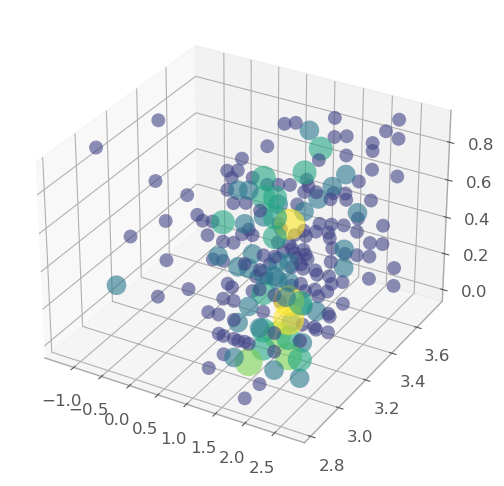

/var/folders/pr/pzfn3sxs66jfxwx55jdxqrd00000gn/T/ipykernel_3328/1724380088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_time"] = df['time'].diff()


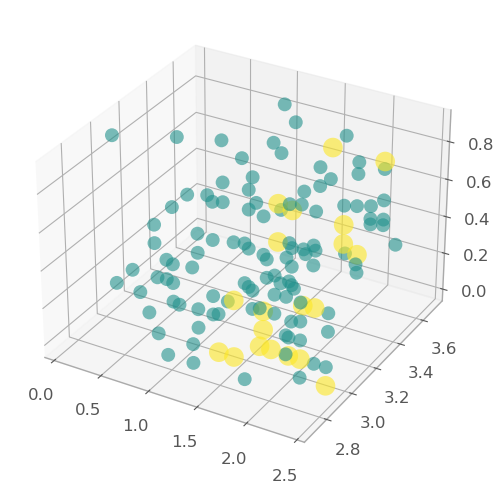

In [58]:
# Loop over all eventfiles
for id in unique_ids[:5]:
    # Filter to eventfile and labels according to unique identifier
    df = df_inputs[df_inputs['obsreg_id']==id]
    dfy = df_labels[df_labels['obsreg_id'] == id]
    # Add delta_time column
    df["delta_time"] = df['time'].diff()
    # Remove first row as delta_time = nan
    df = df[df["delta_time"].notna()]
    # Add a constant value "pseudo-count" 0.1 to delta_time = 0 
    df["delta_time"] = df["delta_time"].apply(lambda dt: np.where(dt == 0, dt + 0.1, dt))
    # Eventfile length, duration and energy range
    N = len(df) 
    T = max(df["time"])-min(df["time"])
    E = max(df["energy"])-min(df["energy"])
    # Add dt column
    df["dt"] = np.log10(100 * N * df["delta_time"]/T)
    # Add E column
    df["E"] = np.log10(df["energy"])
    # Add t column
    df["t"] = (df["time"]-min(df["time"]))/T
    
    # Assuming your 3D data is stored in a NumPy array called 'data'
    # and has three columns representing x, y, and z coordinates
    dt = df["dt"]
    E = df["E"]
    t = df["t"]

    # Define the number of bins for each dimension
    xbins = nbins_dt
    ybins = nbins_E
    zbins = nbins_t

    # Create histogram representation
    fig, (hist_Edt, hist_Et, hist_dtt) = plt.subplots(figsize=(8,8))
    #hist = plt.hist2d(df["dt"],df["E"],range = [[dt_axis_min, dt_axis_max],[np.log10(500.), np.log10(7000.)]],bins=(nbins_dt,nbins_E),norm=LogNorm(),cmap = 'plasma', density = True) 
    hist_Edt = plt.hist2d(df["dt"],df["E"],range = [[dt_axis_min, dt_axis_max],[np.log10(500.), np.log10(7000.)]],bins=(nbins_dt,nbins_E),norm=LogNorm(),cmap = 'plasma')
    hist_Et = plt.hist2d(df["t"],df["E"],range = [[0,1],[np.log10(500.), np.log10(7000.)]],bins=(nbins_t,nbins_E),norm=LogNorm(),cmap = 'plasma') 
    hist_dtt = plt.hist2d(df["t"],df["dt"],range = [[0,1],[dt_axis_min, dt_axis_max]],bins=(nbins_t,nbins_dt),norm=LogNorm(),cmap = 'plasma') 

    # Compute the 3D histogram using numpy.histogramdd()
    hist3D, edges = np.histogramdd((dt, E, t), bins=(xbins, ybins, zbins))

    # Create a 3D scatter plot of the original data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(dt, E, t, s=1, c=E, cmap='viridis', alpha=0.5)

    # Create a 3D histogram plot using matplotlib.pyplot.scatter()
    x, y, z = np.meshgrid(edges[0][:-1], edges[1][:-1], edges[2][:-1], indexing='ij')
    x = np.ravel(x)
    y = np.ravel(y)
    z = np.ravel(z)
    h = np.ravel(hist3D)

    ax.scatter(x, y, z, s=h*100, alpha=0.6, edgecolors='none', c=h, cmap='viridis')

    plt.show()